# Dirac Notation Implementation - Test

## Set up the environment

In [1]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
session = WolframLanguageSession()

In [2]:
from diracdec import *
from diracdec import dirac_bigop_delta_parse as parse, dirac_bigop_delta_trs as trs, juxt

In [ ]:
sub = Subst({
    "ket0" : parse('''KET('0')'''),
    "bra0" : parse('''BRA('0')'''),
    "ket1" : parse('''KET('1')'''),
    "bra1" : parse('''BRA('1')'''),
    "ketP" : parse(''' "Sqrt[1/2]" SCR (ket0 ADD ket1) '''),
    "braP" : parse(''' "Sqrt[1/2]" SCR (bra0 ADD bra1) '''),
    "ketM" : parse(''' "Sqrt[1/2]" SCR (ket0 ADD ("-1" MLTK ket1)) '''),
    "braM" : parse(''' "Sqrt[1/2]" SCR (bra0 ADD ("-1" MLTB bra1)) '''),

    "beta00" : parse(''' "Sqrt[1/2]" SCR ((ket0 TSRK ket0) ADD (ket1 TSRK ket1))'''),

    "I2" : parse('''(ket0 OUTER bra0) ADD (ket1 OUTER bra1)'''),

    "Z" : parse('''(ket0 OUTER bra0) ADD ("-1" SCR (ket1 OUTER bra1))'''),

    "X" : parse('''(ket0 OUTER bra1) ADD (ket1 OUTER bra0)'''),

    "Y" : parse('''("-I" SCR (ket0 OUTER bra1)) ADD ("I" SCR (ket1 OUTER bra0))'''),


    "H" : parse(''' "Sqrt[1/2]" SCR ((ket0 OUTER bra0) ADD (ket0 OUTER bra1) ADD (ket1 OUTER bra0) ADD ("-1" SCR (ket1 OUTER bra1)))'''),

    "CX": parse(''' ((ket0 TSRK ket0) OUTER (bra0 TSRB bra0))
                ADD ((ket0 TSRK ket1) OUTER (bra0 TSRB bra1)) 
                ADD ((ket1 TSRK ket1) OUTER (bra1 TSRB bra0))
                ADD ((ket1 TSRK ket0) OUTER (bra1 TSRB bra1))'''),

    "CZ": parse(''' ((ket0 TSRK ket0) OUTER (bra0 TSRB bra0))
                ADD ((ket0 TSRK ket1) OUTER (bra0 TSRB bra1)) 
                ADD ((ket1 TSRK ket0) OUTER (bra1 TSRB bra0))
                ADD ("-1" SCR ((ket1 TSRK ket1) OUTER (bra1 TSRB bra1)))'''),

}).get_idempotent()


## Abstraction Demo

In [4]:
# define the rotation gates
sub_rot = Subst({
    "Rz" : sub(parse(''' FUN beta . ( ("Cos[beta/2]" SCR I2) ADD ("- Sin[beta/2] I" SCR Z) )''')),
    "Ry" : sub(parse(''' FUN gamma . ( ("Cos[gamma/2]" SCR I2) ADD ("- Sin[gamma/2] I" SCR Y) )''')),
})

# get the idempotent operation
new_sub = sub_rot.composite(sub).get_idempotent()

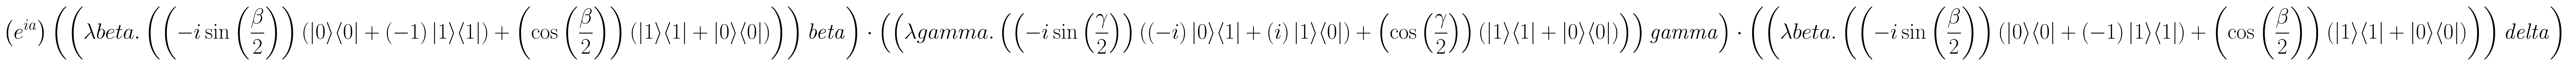

In [5]:
# RHS - rotations
a = new_sub(parse(''' "Exp[I a]" SCR ((Rz @ beta) MLTO (Ry @ gamma) MLTO (Rz @ delta)) '''))
a.render_tex()

== STEP 1 ==
Current Term:
⎛⎛       ⎛⎛       beta                              ⎞   ⎛    beta                         ⎞⎞⎞      ⎛        ⎛⎛       gamma                                  ⎞   ⎛    gamma                         ⎞⎞⎞      ⎞
⎜⎜λ beta.⎜⎜-I Sin[----].((|0>⊗<0|) + (-1.(|1>⊗<1|)))⎟ + ⎜Cos[----].((|1>⊗<1|) + (|0>⊗<0|))⎟⎟⎟ beta·⎜λ gamma.⎜⎜-I Sin[-----].((-I.(|0>⊗<1|)) + (I.(|1>⊗<0|)))⎟ + ⎜Cos[-----].((|1>⊗<1|) + (|0>⊗<0|))⎟⎟⎟ gamma⎟
⎝⎝       ⎝⎝        2                                ⎠   ⎝     2                           ⎠⎠⎠      ⎝        ⎝⎝         2                                    ⎠   ⎝      2                           ⎠⎠⎠      ⎠

┌apply OPT-SCR-5──────────────────────────────────────────────────────────────────────────────────────────┐
│⎛       beta                              ⎞    ⎛⎛       beta           ⎞   ⎛       beta                ⎞⎞│
│⎜-I Sin[----].((|0>⊗<0|) + (-1.(|1>⊗<1|)))⎟ -> ⎜⎜-I Sin[----].(|0>⊗<0|)⎟ + ⎜-I Sin[----].(-1.(|1>⊗<1|))⎟⎟│
│⎝        2                   

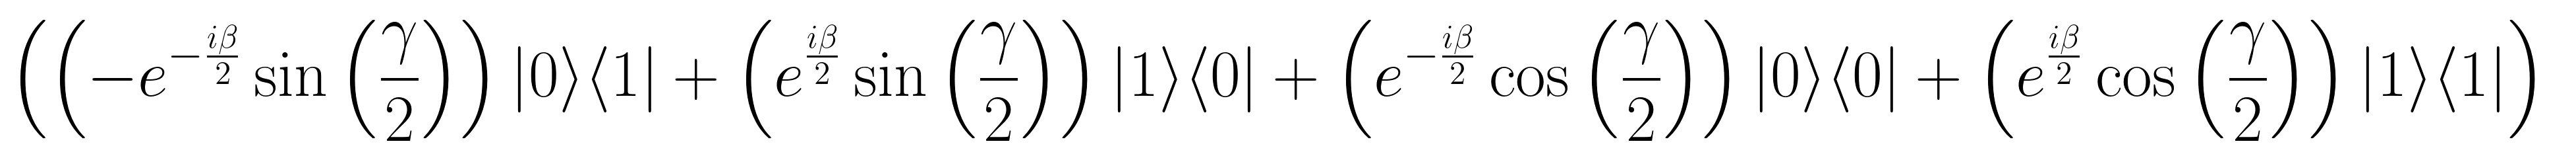

In [6]:
trs.normalize(new_sub(parse(''' (Rz @ beta) MLTO (Ry @ gamma) ''')), verbose=True).render_tex()

In [7]:
# LHS - U
b = new_sub(parse(''' ("Exp[I (a - beta/2 - delta/2)] Cos[gamma/2]" SCR (ket0 OUTER bra0))
    ADD ("- Exp[I (a - beta/2 + delta/2)] Sin[gamma/2]" SCR (ket0 OUTER bra1)) 
    ADD ("Exp[I (a + beta/2 - delta/2)] Sin[gamma/2]" SCR (ket1 OUTER bra0))
    ADD ("Exp[I (a + beta/2 + delta/2)] Cos[gamma/2]" SCR (ket1 OUTER bra1))'''))

norm_a = trs.normalize(sub(a))
norm_b = trs.normalize(sub(b))
assert norm_a == norm_b


AssertionError: 

## ATransPhi Demo

In [ ]:
a = parse(''' 
                (
                    (
                        SUM(i, KET(i) OUTER BRA(i)) TSRO 1O
                    ) 
                    MLTO (A TSRO 1O)
                ) 
                MLTK 
                (
                    SUM(i, KET(PAIR(i, i)))
                ) 
            ''')

b = parse(''' 
                (
                    (1O TSRO SUM(i, KET(i) OUTER BRA(i))) MLTO (1O TSRO TP(A))
                ) 
                MLTK 
                (
                    SUM(i, KET(PAIR(i, i)))
                ) 
            ''')


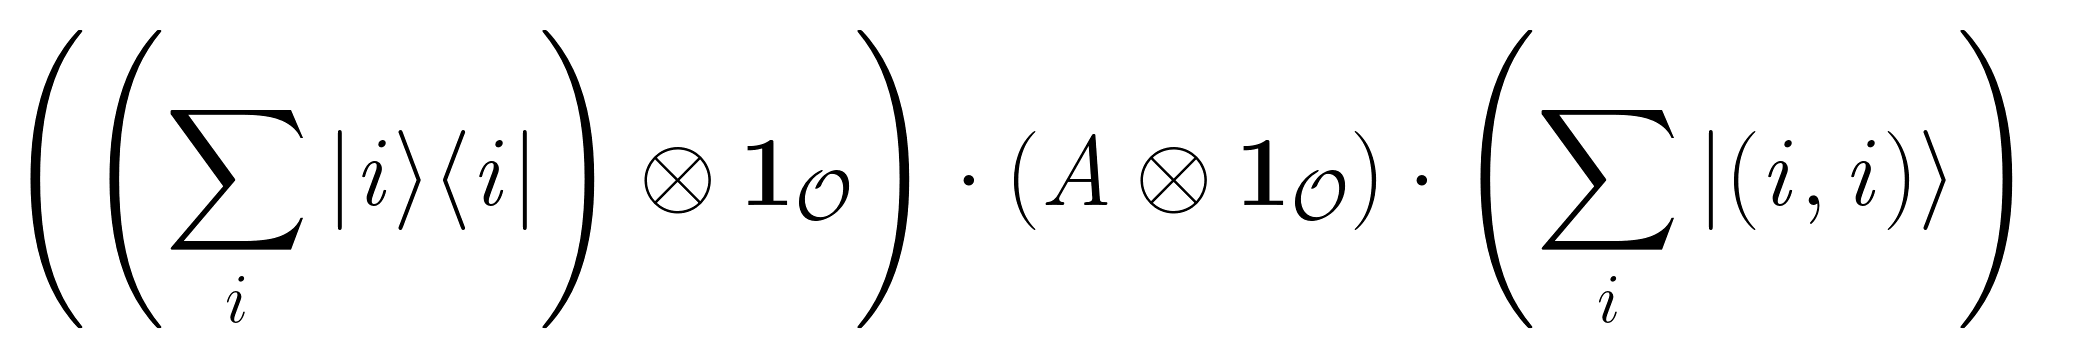

In [ ]:
a.render_tex()

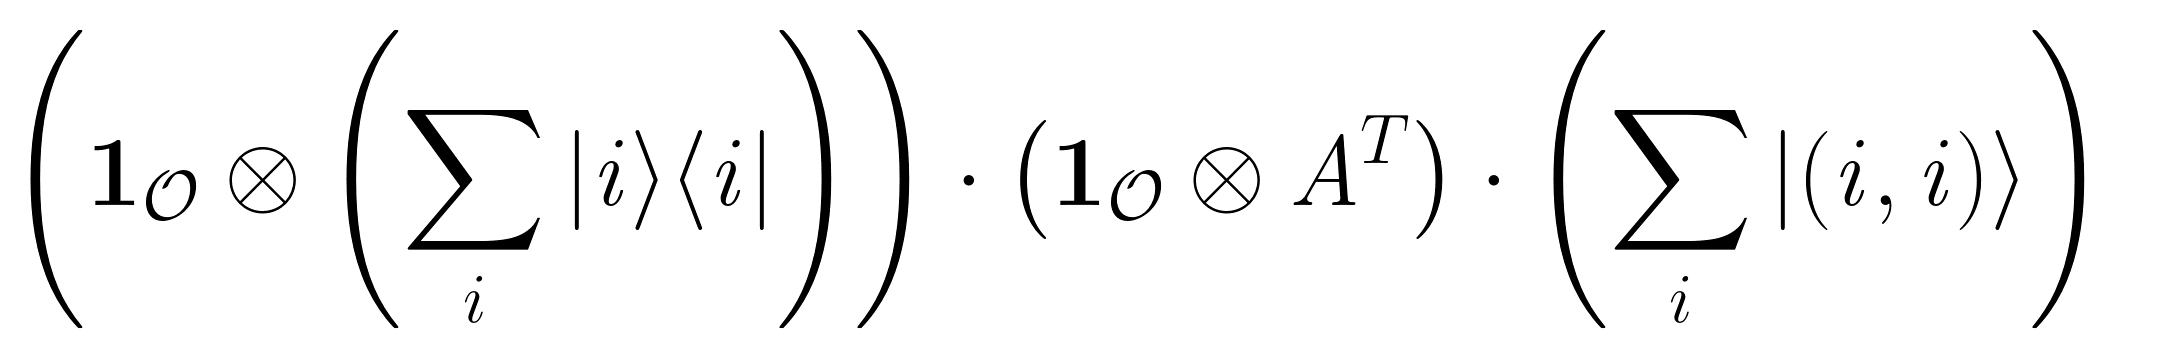

In [ ]:
b.render_tex()

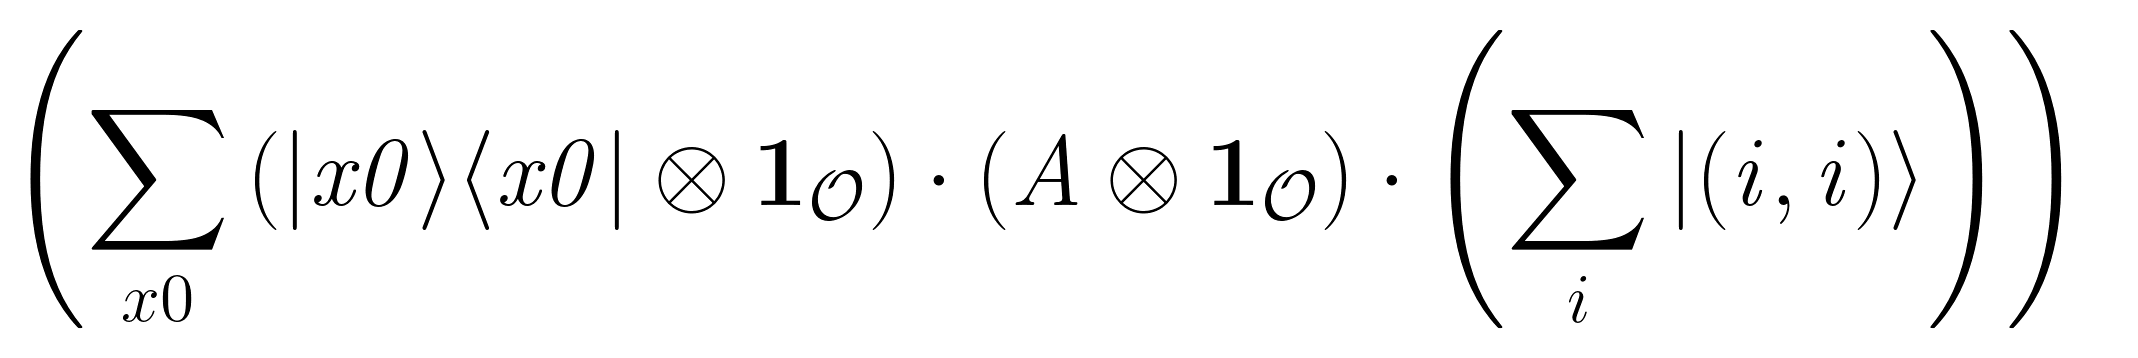

In [ ]:
norm_a = trs.normalize(a)
norm_a.render_tex()

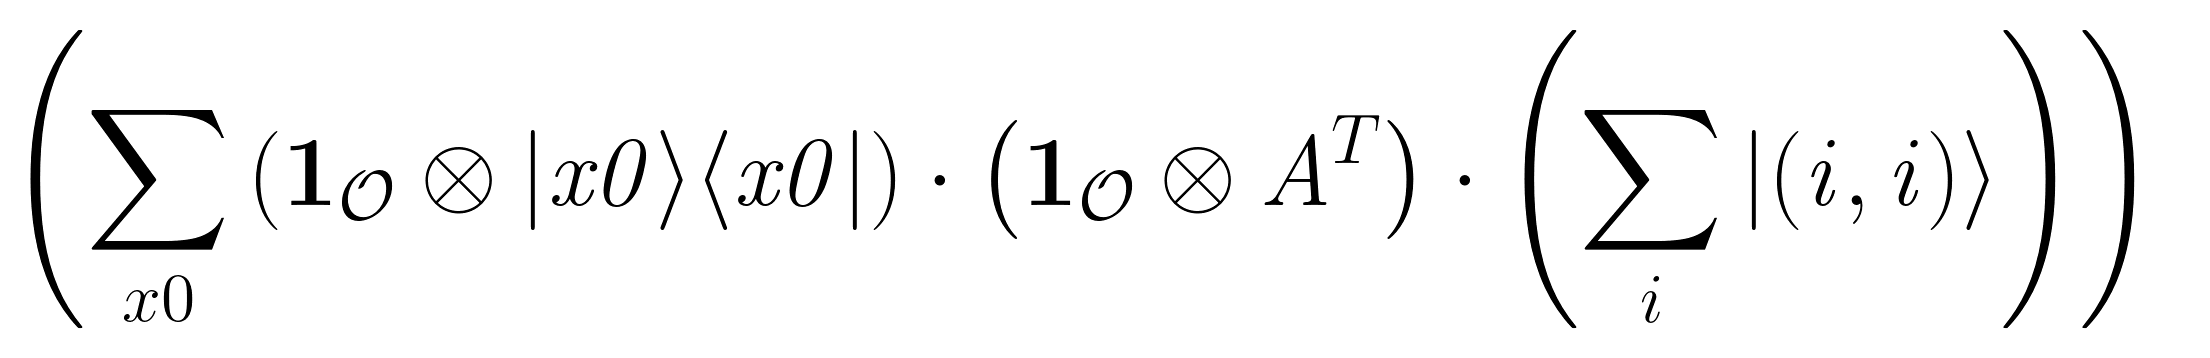

In [ ]:
norm_b = trs.normalize(b)
norm_b.render_tex()

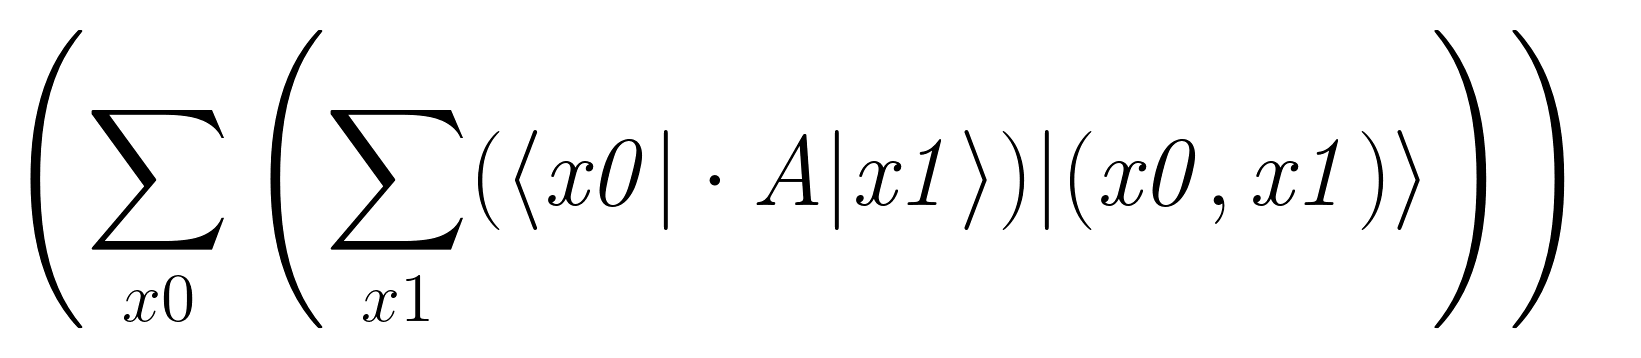

In [ ]:
juxt(sumeq(norm_a)).render_tex()

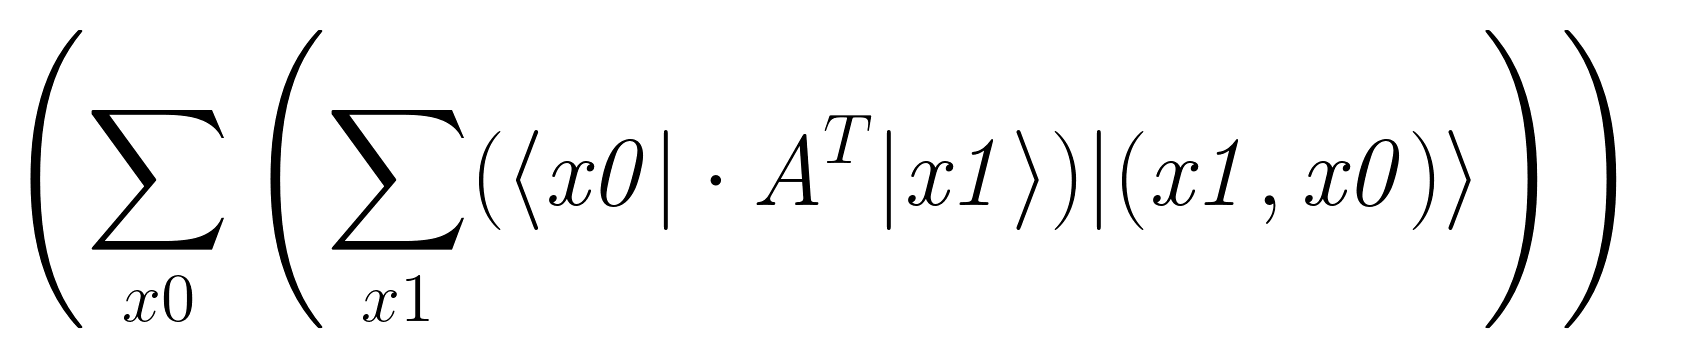

In [ ]:
juxt(sumeq(norm_b)).render_tex()

In [ ]:
expr_a = trs.normalize(juxt(sumeq(norm_a)))
expr_b = trs.normalize(juxt(sumeq(norm_b)))
expr_a == expr_b

True

## Playground

In [ ]:
new_sub = Subst({
    "choi" : parse(r''' 
    FUN A . SUM(i, 
                SUM(j, 
                    (BRA(i) DOT (A MLTK KET(j)))
                    SCR KET(PAIR(i,j))
                )    
            ) '''),
    "unchoi" : parse(r'''
    FUN A . SUM(i,
                SUM(j,
                     (BRA(PAIR(i, j)) DOT A)
                     SCR (KET(i) OUTER BRA(j))
                    )
            )''')
})
sub = new_sub.composite(sub).get_idempotent()

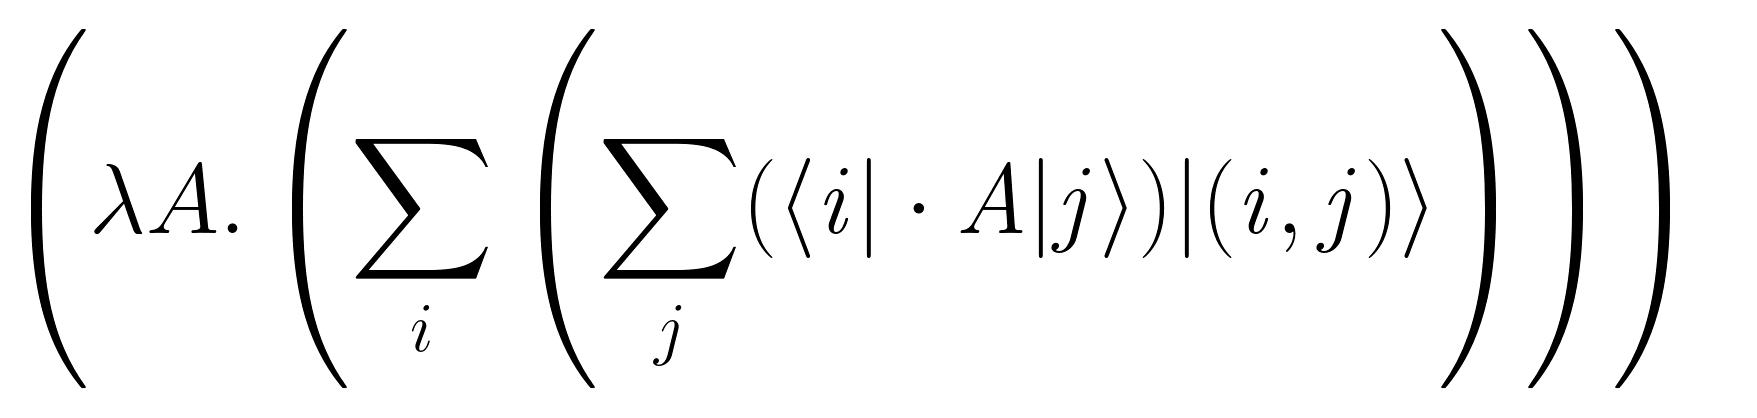

In [ ]:
a = sub(parse(r'''choi'''))
a.render_tex()

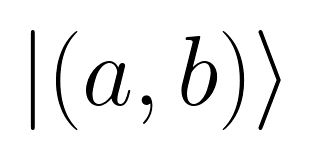

In [ ]:
a_ = sub(parse(r''' choi @ (KET('a') OUTER BRA('b')) '''))
trs.normalize(a_).render_tex()

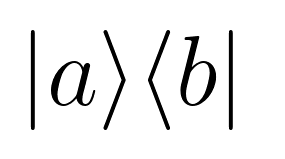

In [ ]:
b_ = sub(parse(r'''unchoi @ (KET(PAIR('a', 'b')))'''))
trs.normalize(b_).render_tex()

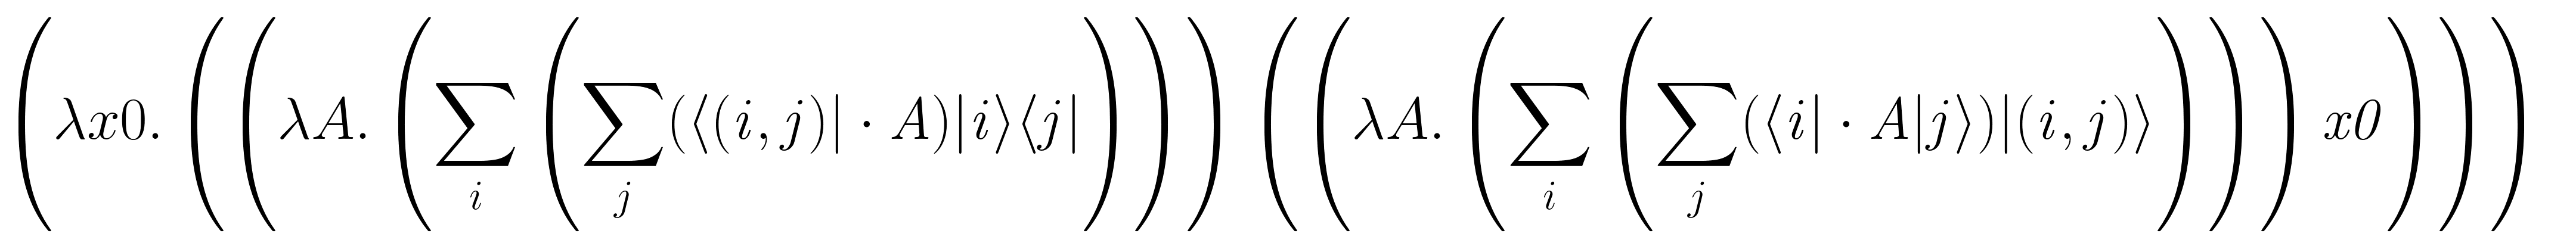

In [ ]:
c = sub(parse(r'''FUN A . unchoi @ (choi @ A) '''))
c.render_tex()

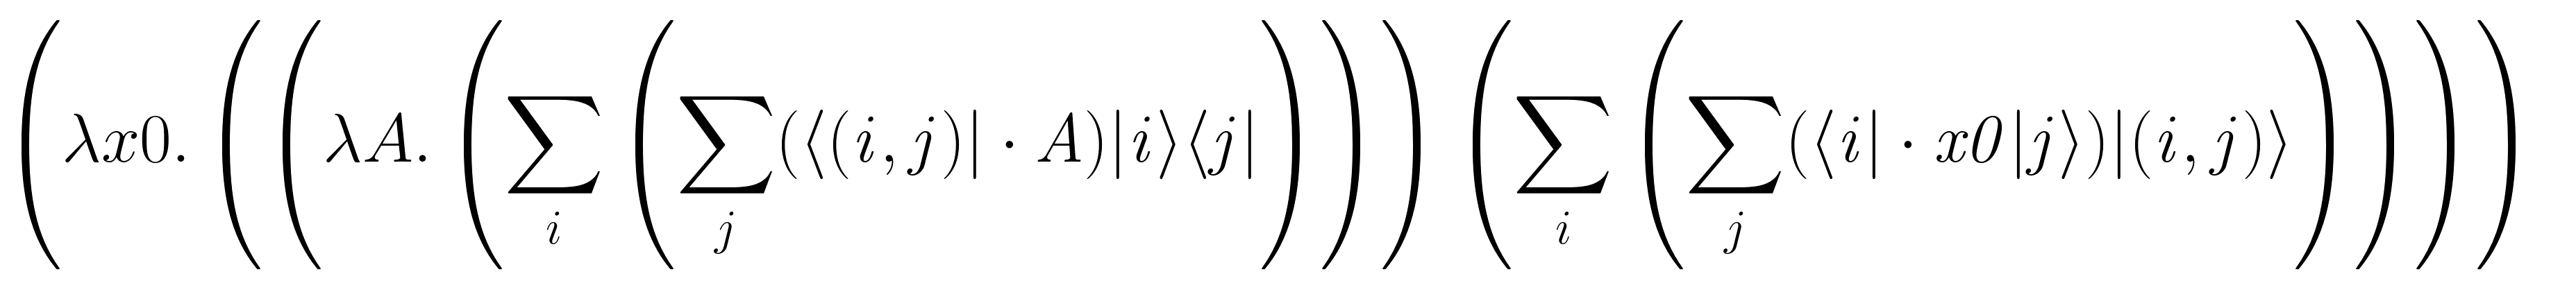

In [ ]:
trs.normalize(c, step_limit=1).render_tex()

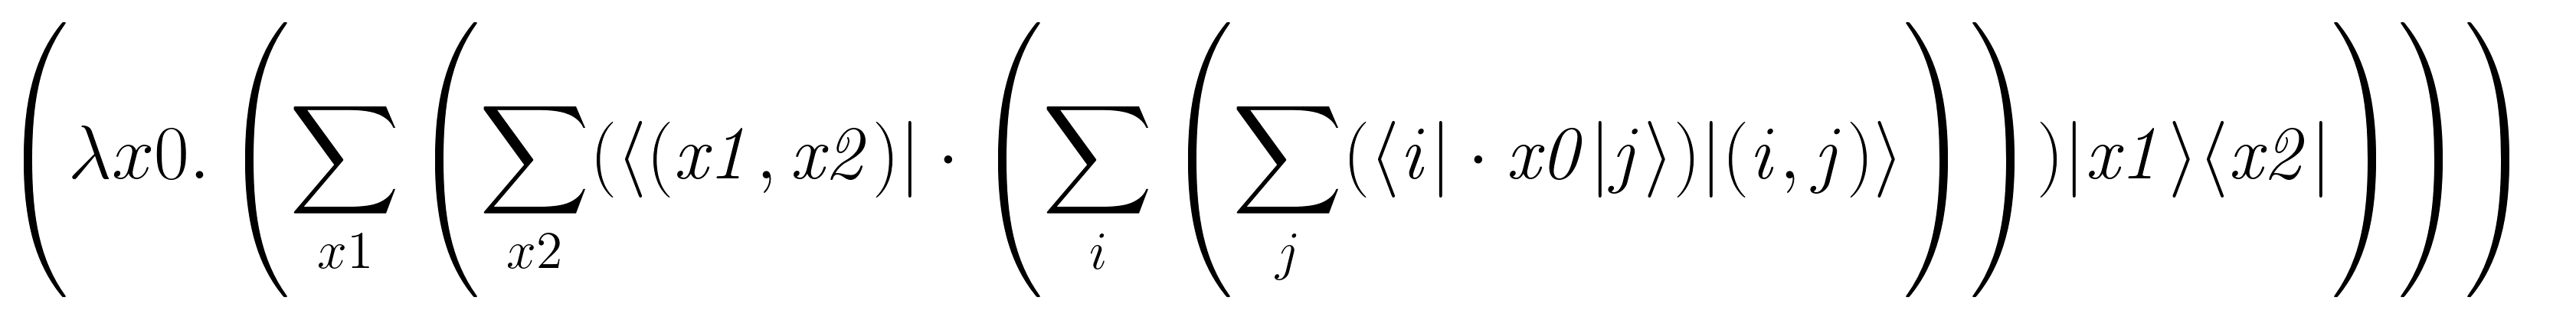

In [ ]:
trs.normalize(c, step_limit=2).render_tex()

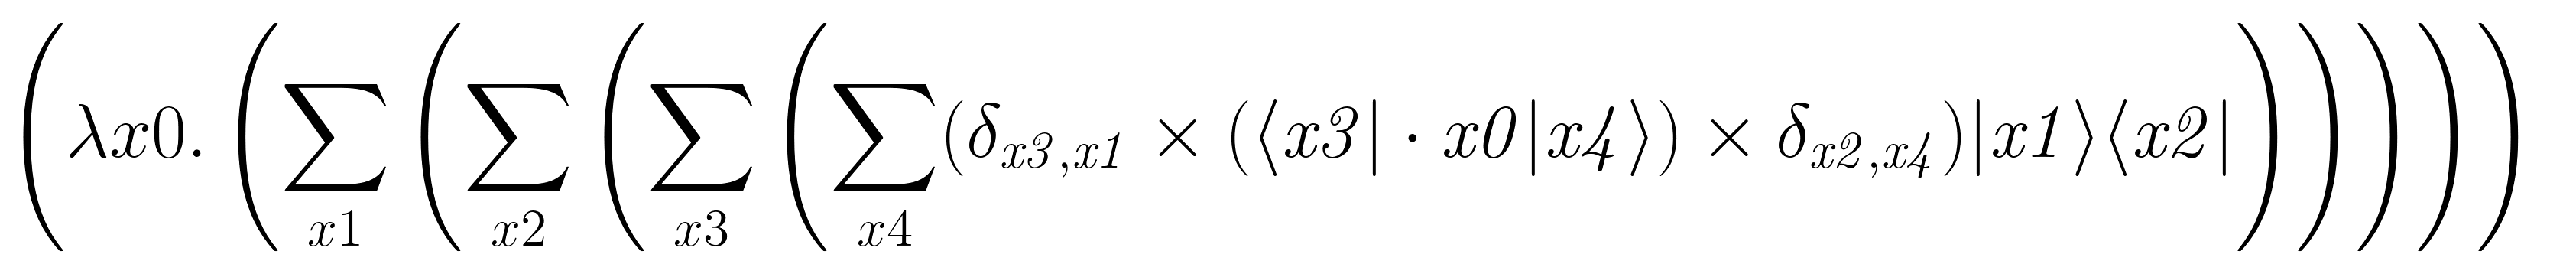

In [ ]:
trs.normalize(c).render_tex()

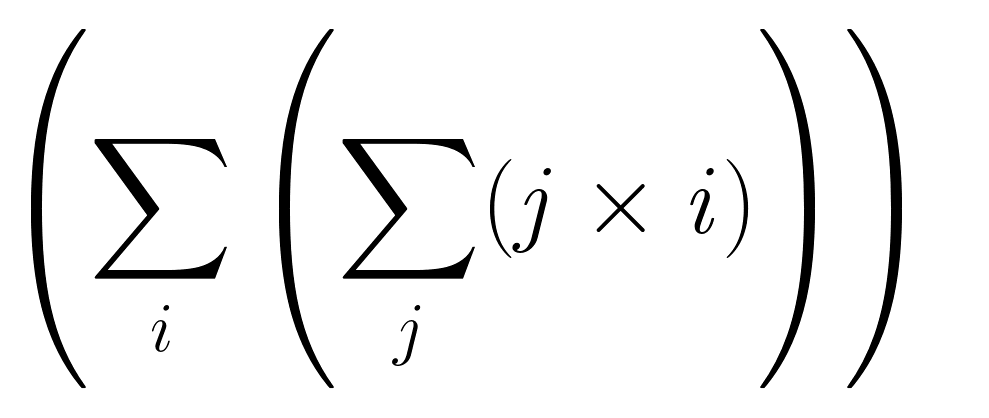

In [ ]:
test = parse(r'''SUM(i, SUM(j, i MLTS j)) ''')
trs.normalize(test).render_tex()

## Readable Tex Proof

In [8]:
from IPython.core.display import Image
import matplotlib.pyplot as plt
import tempfile

In [25]:

def render_tex(formula: str, filename:str|None = None, dpi=300) -> Image:
    '''
    render the latex math formula and return an Image object
    Notice: there should be no line breaks in the formula, and the formula must not be embraced in $ $
    '''

    formula = "$$ " + formula + " $$"
    
    # Configure Matplotlib to use LaTeX for text rendering
    plt.rcParams['text.usetex'] = True

    # Create a figure with no frame
    fig = plt.figure(figsize=(6, 1))
    fig.text(0, 0, formula, fontsize=24)

    # render the formula again
    fig.text(0.2, 0, formula, fontsize=24)
    
    if filename is None:

        # Use a temporary file to save the figure
        with tempfile.NamedTemporaryFile(delete=True, suffix=f'.png') as tmpfile:
            fig.savefig(tmpfile.name, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
            plt.close(fig)
            return Image(tmpfile.name)
    
    else:
        # Save the figure as an image
        fig.savefig(filename, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
        plt.close(fig)
        return Image(filename)

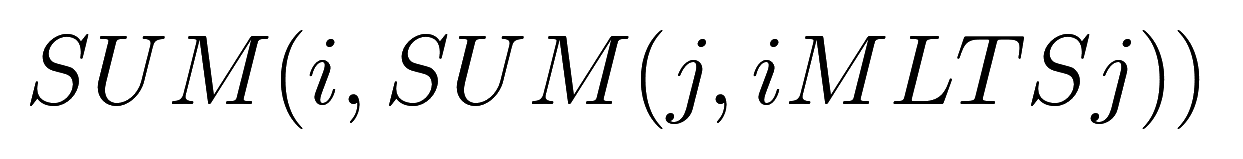

In [26]:
render_tex('SUM(i, SUM(j, i MLTS j))', filename='test.png')